The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


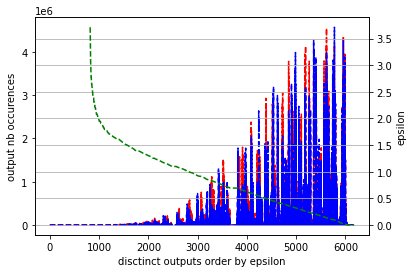


computing semi-theoricial delta
Comparison between the Three deltas:


inverse


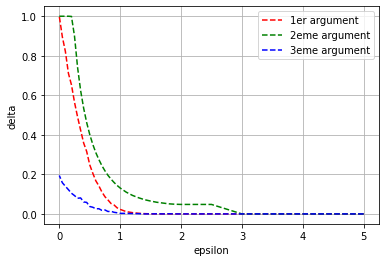

Delta from recapture:


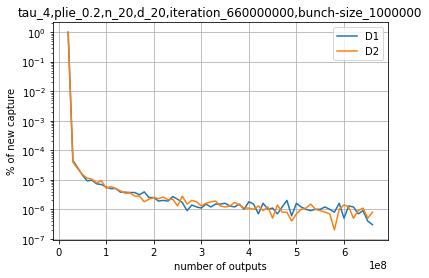

In [5]:
%load_ext autoreload
%autoreload 2

from Simulation import *
from Ploting import *
from Theorical_functions import *

#param datasets
initial_dataset=-1 # if different from -1, the inital dataset is not generated randomly but taken from initial_dataset  e.g of value initial_dataset=[2,0,3]
forced_neighbors=[0,0]  #if different from [0,0], the neighbor dataset is built by removing one message from target forced_neighbors[0] and adding one message to forced_neighbors[1]
with_seed = 4 #reproductibility of the experiment: in dataset with variation on extreeme small/big values


# Params algo
plie=0.2  #sampling rate
tau=4    #nb targets
n=20     #nb real values 
d=20     #nb dummies


# param experiment
nb_bunches_finished=50
bunch_size=10000000 #size of the bunch
iterations=660000000 #nb of produced output
limit_keys=-1  #if different from -1, only limit_keys keys are selected for the final result




# generate delta structure from the previously generated csv files (a build must be done before with the same parameters)
delta_simu,birds = experiments(tau,plie,n,d,with_seed,iterations,bunch_size,forced_neighbors,initial_dataset,limit_keys)


#generate a theorical delta
delta_theoric=generate_theorical_delta(tau,n,d,plie)


#generate delta estimated with Li's variable
nb_runs=100
delta_semi_experimental=generate_delta_Semi_TH(tau,plie,n,d,nb_runs)

filename="tau_{},plie_{},n_{},d_{},iteration_{},bunch-size_{},seed_{},initial-dataset_{},forced-neighbors_{},limit-Keys_{}.jpeg".format(tau,plie,n,d,iterations,bunch_size,with_seed,initial_dataset,forced_neighbors,limit_keys)

print("Comparison between the Three deltas:")
# plot the three curves
plot_three_delta2(delta_simu, delta_theoric, delta_semi_experimental,filename)


print("inverse")
plot_three_delta_inverse(delta_simu, delta_theoric, delta_semi_experimental)

#plot the recapture
print("Delta from recapture:")
lissage=1 # how many bunches are considered for the average, default value =1
plot_birds2(birds,lissage,filename)




In [48]:
#delta=10^-4
%load_ext autoreload
%autoreload 2
from Serialization import *
from Simulation import *
import matplotlib.pyplot as plt

tau=4
plie=0.2
n=20
d=20
with_seed=4
bunch_size=10000000
initial_dataset=-1
forced_neighbors=[0, 0]
limit_keys=-1
desired_delta=0.0001

x_range=[]
y_range=[]
eps_semi_TH=get_epsilon_Semi_TH(tau,plie,n,d,desired_delta,nb_runs=10000,pas=0.01)
eps_TH=eps_algo(tau,n,d, plie,desired_delta)

for i in range(1,51):
    iterations=i*bunch_size
    x_range.append(iterations)
    csv_filename=gen_name_res(tau,plie,n,d,with_seed,iterations,bunch_size,initial_dataset,forced_neighbors,limit_keys)


    Res, birds= extract_res_structure(tau,plie,n,d,with_seed,iterations,bunch_size,forced_neighbors,initial_dataset,limit_keys)
    Eps=generate_epsilon(Res)


    produced_outputs=0
    
    produced_outputs = iterations*2
    
    cum_delta=0
    for j,i in enumerate(Eps):
        cum_delta+=(i[1]+i[2])/(produced_outputs)
        if cum_delta>=desired_delta:
            y_range.append(Eps[j][0])
            break
        


y_range_TH=[eps_TH for i in range(len(x_range))]
y_range_semi_TH=[eps_semi_TH for i in range(len(x_range))]
plt.figure()
plt.plot(x_range,y_range,'r--',label="EPS_XP")
plt.plot(x_range,y_range_semi_TH,'g--',label="EPS_SEMI_TH")
plt.plot(x_range,y_range_TH,'b--',label="EPS_TH")
plt.legend()
plt.grid()
plt.ylabel('epsilon')
plt.xlabel('number of produced outputs')
plt.show()

plt.figure()
plt.plot(x_range,y_range,'r--',label="EPS_XP")
plt.plot(x_range,y_range_semi_TH,'g--',label="EPS_SEMI_TH")
plt.legend()
plt.grid()
plt.ylabel('epsilon')
plt.xlabel('number of produced outputs')
plt.show()



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
#delta=10^-3
%load_ext autoreload
%autoreload 2
from Serialization import *
from Simulation import *
import matplotlib.pyplot as plt

tau=4
plie=0.2
n=20
d=20
with_seed=4
bunch_size=10000000
initial_dataset=-1
forced_neighbors=[0, 0]
limit_keys=-1
desired_delta=0.001

x_range=[]
y_range=[]
eps_semi_TH=get_epsilon_Semi_TH(tau,plie,n,d,desired_delta,nb_runs=10000,pas=0.01)
eps_TH=eps_algo(tau,n,d, plie,desired_delta)

for i in range(1,51):
    iterations=i*bunch_size
    x_range.append(iterations)
    csv_filename=gen_name_res(tau,plie,n,d,with_seed,iterations,bunch_size,initial_dataset,forced_neighbors,limit_keys)


    Res, birds= extract_res_structure(tau,plie,n,d,with_seed,iterations,bunch_size,forced_neighbors,initial_dataset,limit_keys)
    Eps=generate_epsilon(Res)


    produced_outputs=0
    
    produced_outputs = iterations*2
    
    cum_delta=0
    for j,i in enumerate(Eps):
        cum_delta+=(i[1]+i[2])/(produced_outputs)
        if cum_delta>=desired_delta:
            y_range.append(Eps[j][0])
            break
        


y_range_TH=[eps_TH for i in range(len(x_range))]
y_range_semi_TH=[eps_semi_TH for i in range(len(x_range))]
plt.figure()
plt.plot(x_range,y_range,'r--',label="EPS_XP")
plt.plot(x_range,y_range_semi_TH,'g--',label="EPS_SEMI_TH")
plt.plot(x_range,y_range_TH,'b--',label="EPS_TH")
plt.legend()
plt.grid()
plt.ylabel('epsilon')
plt.xlabel('number of produced outputs')
plt.show()

plt.figure()
plt.plot(x_range,y_range,'r--',label="EPS_XP")
plt.plot(x_range,y_range_semi_TH,'g--',label="EPS_SEMI_TH")
plt.legend()
plt.grid()
plt.ylabel('epsilon')
plt.xlabel('number of produced outputs')
plt.show()



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


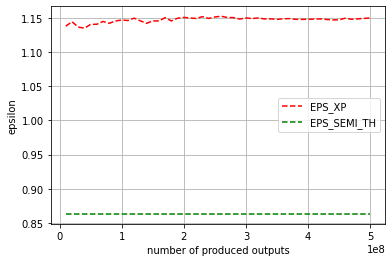

In [50]:
#delta=10^-2
%load_ext autoreload
%autoreload 2
from Serialization import *
from Simulation import *
import matplotlib.pyplot as plt

tau=4
plie=0.2
n=20
d=20
with_seed=4
bunch_size=10000000
initial_dataset=-1
forced_neighbors=[0, 0]
limit_keys=-1
desired_delta=0.01

x_range=[]
y_range=[]
eps_semi_TH=get_epsilon_Semi_TH(tau,plie,n,d,desired_delta,nb_runs=10000,pas=0.01)
eps_TH=eps_algo(tau,n,d, plie,desired_delta)

for i in range(1,51):
    iterations=i*bunch_size
    x_range.append(iterations)
    csv_filename=gen_name_res(tau,plie,n,d,with_seed,iterations,bunch_size,initial_dataset,forced_neighbors,limit_keys)


    Res, birds= extract_res_structure(tau,plie,n,d,with_seed,iterations,bunch_size,forced_neighbors,initial_dataset,limit_keys)
    Eps=generate_epsilon(Res)


    produced_outputs=0
    
    produced_outputs = iterations*2
    
    cum_delta=0
    for j,i in enumerate(Eps):
        cum_delta+=(i[1]+i[2])/(produced_outputs)
        if cum_delta>=desired_delta:
            y_range.append(Eps[j][0])
            break
        


y_range_TH=[eps_TH for i in range(len(x_range))]
y_range_semi_TH=[eps_semi_TH for i in range(len(x_range))]
plt.figure()
plt.plot(x_range,y_range,'r--',label="EPS_XP")
plt.plot(x_range,y_range_semi_TH,'g--',label="EPS_SEMI_TH")
plt.plot(x_range,y_range_TH,'b--',label="EPS_TH")
plt.legend()
plt.grid()
plt.ylabel('epsilon')
plt.xlabel('number of produced outputs')
plt.show()

plt.figure()
plt.plot(x_range,y_range,'r--',label="EPS_XP")
plt.plot(x_range,y_range_semi_TH,'g--',label="EPS_SEMI_TH")
plt.legend()
plt.grid()
plt.ylabel('epsilon')
plt.xlabel('number of produced outputs')
plt.show()



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


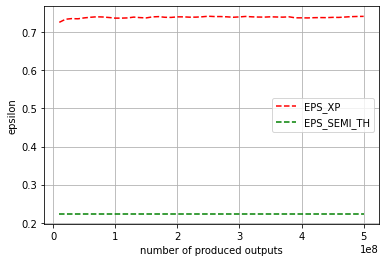

In [51]:
#delta=10^-1
%load_ext autoreload
%autoreload 2
from Serialization import *
from Simulation import *
import matplotlib.pyplot as plt

tau=4
plie=0.2
n=20
d=20
with_seed=4
bunch_size=10000000
initial_dataset=-1
forced_neighbors=[0, 0]
limit_keys=-1
desired_delta=0.1

x_range=[]
y_range=[]
eps_semi_TH=get_epsilon_Semi_TH(tau,plie,n,d,desired_delta,nb_runs=10000,pas=0.01)
eps_TH=eps_algo(tau,n,d, plie,desired_delta)

for i in range(1,51):
    iterations=i*bunch_size
    x_range.append(iterations)
    csv_filename=gen_name_res(tau,plie,n,d,with_seed,iterations,bunch_size,initial_dataset,forced_neighbors,limit_keys)


    Res, birds= extract_res_structure(tau,plie,n,d,with_seed,iterations,bunch_size,forced_neighbors,initial_dataset,limit_keys)
    Eps=generate_epsilon(Res)


    produced_outputs=0
    
    produced_outputs = iterations*2
    
    cum_delta=0
    for j,i in enumerate(Eps):
        cum_delta+=(i[1]+i[2])/(produced_outputs)
        if cum_delta>=desired_delta:
            y_range.append(Eps[j][0])
            break
        


y_range_TH=[eps_TH for i in range(len(x_range))]
y_range_semi_TH=[eps_semi_TH for i in range(len(x_range))]
plt.figure()
plt.plot(x_range,y_range,'r--',label="EPS_XP")
plt.plot(x_range,y_range_semi_TH,'g--',label="EPS_SEMI_TH")
plt.plot(x_range,y_range_TH,'b--',label="EPS_TH")
plt.legend()
plt.grid()
plt.ylabel('epsilon')
plt.xlabel('number of produced outputs')
plt.show()

plt.figure()
plt.plot(x_range,y_range,'r--',label="EPS_XP")
plt.plot(x_range,y_range_semi_TH,'g--',label="EPS_SEMI_TH")
plt.legend()
plt.grid()
plt.ylabel('epsilon')
plt.xlabel('number of produced outputs')
plt.show()

